In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model


In [ ]:
from tensorflow.keras.applications import EfficientNetB0


In [ ]:
train_dir = '/content/drive/MyDrive/archive/Train_Test_Valid/Train'
validation_dir = '/content/drive/MyDrive/archive/Train_Test_Valid/valid'
test_dir = '/content/drive/MyDrive/archive/Train_Test_Valid/test'

In [ ]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 900 images belonging to 6 classes.
Found 39 images belonging to 6 classes.
Found 40 images belonging to 6 classes.


In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))


16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)  # Assuming 6 classes for jellyfish dataset


In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
)


Epoch 1/20
29/29 [==============================] - 250s 8s/step - loss: 1.9061 - accuracy: 0.1511 - val_loss: 1.8531 - val_accuracy: 0.1538
Epoch 2/20
29/29 [==============================] - 89s 3s/step - loss: 1.8338 - accuracy: 0.1511 - val_loss: 1.8180 - val_accuracy: 0.1795
Epoch 3/20
29/29 [==============================] - 88s 3s/step - loss: 1.8049 - accuracy: 0.1633 - val_loss: 1.8006 - val_accuracy: 0.1795
Epoch 4/20
29/29 [==============================] - 87s 3s/step - loss: 1.8009 - accuracy: 0.1511 - val_loss: 1.7990 - val_accuracy: 0.1282
Epoch 5/20
29/29 [==============================] - 88s 3s/step - loss: 1.7997 - accuracy: 0.1589 - val_loss: 1.7982 - val_accuracy: 0.1795
Epoch 6/20
29/29 [==============================] - 87s 3s/step - loss: 1.8028 - accuracy: 0.1667 - val_loss: 1.7969 - val_accuracy: 0.1795
Epoch 7/20
29/29 [==============================] - 89s 3s/step - loss: 1.7966 - accuracy: 0.1522 - val_loss: 1.7929 - val_accuracy: 0.1795
Epoch 8/20
29/29 [=

In [ ]:
# Define the file path where you want to save the model
model_path = "Train-3.ipynb.h5"

# Save the model
model.save(model_path)

print("Model saved successfully at:", model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: Train-3.ipynb.h5


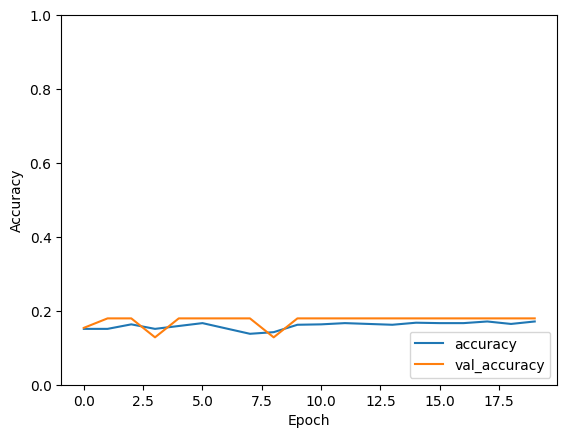

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


Comments:
Accuracy at 0.18: This means that, on average, the model correctly predicts the class of only 18% of the training examples. In other words, it is performing poorly on the training data, and the majority of predictions are incorrect.
Validation Accuracy at 0.19: Similarly, the validation accuracy indicates that the model correctly predicts the class of only 19% of the validation examples. This suggests that the model's performance is consistent across both the training and validation datasets, but it is still not able to generalize well to unseen data.